<a href="https://colab.research.google.com/github/Shruti-codes/SHALA2020/blob/master/Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1RSyc7khEw2lOX2yg5j-iZFyOxSy8wbse

Downloading...
From: https://drive.google.com/uc?id=1RSyc7khEw2lOX2yg5j-iZFyOxSy8wbse
To: /content/Reviews.csv
301MB [00:03, 95.5MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Reviews.csv')
df = df[:12000]

In [3]:
df.shape

(12000, 10)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import re
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(10000):
  review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review  if not word in stopwords]   #stopword removal
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
corpus = pd.DataFrame(corpus, columns = ["Reviews"])
corpus = corpus.join(df[['Score']])
corpus.head()

,Reviews,Score
0,I bought sever vital can dog food product foun...,5
1,product arriv label jumbo salt peanut peanut a...,1
2,thi confect around centuri It light pillowi ci...,4
3,If look secret ingredi robitussin I believ I f...,2
4,great taffi great price there wide assort yumm...,5


In [6]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
# tfidf.fit(corpus['Reviews'])

In [7]:
X_tfidf = tfidf.fit_transform(corpus['Reviews'])
corpus['Reviews'][2]


'thi confect around centuri It light pillowi citru gelatin nut case filbert and cut tini squar liber coat powder sugar and tini mouth heaven not chewi flavor I highli recommend yummi treat If familiar stori C S lewi the lion the witch the wardrob treat seduc edmund sell brother sister witch'

In [8]:
corpus.dropna(inplace = True)
corpus['Positivity'] = np.where(corpus['Score']>=3, 1, 0)
col = ['Score']
corpus.drop(col, axis =1, inplace= True)
corpus.head()

,Reviews,Positivity
0,I bought sever vital can dog food product foun...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,thi confect around centuri It light pillowi ci...,1
3,If look secret ingredi robitussin I believ I f...,0
4,great taffi great price there wide assort yumm...,1


In [9]:
corpus.groupby('Positivity').size()

Positivity
0    1522
1    8478
dtype: int64

In [10]:
# #using Random Forest because classes are imbalanced

from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
# X = corpus.Reviews
# y = corpus.Positivity
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# cv = CountVectorizer(stop_words = stopwords, max_features = 10000, ngram_range = [1,1])
# rfc = RandomForestClassifier(class_weight = 'balanced')
# cv.fit(X_train, y_train)
# train_pred = rfc.predict(X_train)
# test_pred = rfc.predict(X_test)

# #Cross-Validation
# kfold = KFold(n_splits=10, random_state=0)
# res = cross_val_score(rfc, X_train, y_train, cv=kfold)
# plt.plot(np.arange(10), res ,'x-', linewidth = 1.5)
# plt.show()
# print("Accuracy (after Cross validation) = %.2f%% (+/- %0.2f)" % (res.mean()*100), res.std()*2)

# print(classification_report(y_test, y_pred, target_names = ['negative', 'positive']))




In [11]:
#Chi2 feature selection

from sklearn.feature_selection import chi2
y = corpus.Positivity
chi2score = chi2(X_tfidf, y)[0]


Using TensorFlow backend.


(8000, 981)
(2000, 981)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 981, 150)          4500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 4,781,202
Trainable params: 4,781,202
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
10000/10000 [==============================] - 621s 62ms/step - loss: 0.3834 - accuracy: 0.8511
Epoch 2/10
10000/10000 [==============================] - 631s 63ms/step - loss: 0.2475 - accuracy: 0.9003
Epoch 3/10
10000/10000 [==============================] - 636s 64ms/step - loss: 0.1621 - accuracy: 0.9370
Epoch 4/10
10000/10000 [==============================] - 638s 64ms/step - loss: 0.1043 - accuracy: 0.9619
Epoch 5/10
10000/10000 [==============================] - 630s 63ms/step - loss: 0.0698 - accuracy: 0.9751
Epoch 6/10
10000/10000 [==============================] - 632s 63ms/step - loss: 0.0485 - accuracy: 0.9824
Epoch 7/10
10000/10000 [==============================] - 622s 62ms/step - loss: 0.0308 - accuracy: 0.9895
Epoch 8/10
10000/10000 [==============================] - 621s 62ms/step - loss: 0.0180 - accuracy: 0.9957
Epoch 9/10
10000/10000 [==============================] - 631s 63ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 10/10
10000/10000 [============

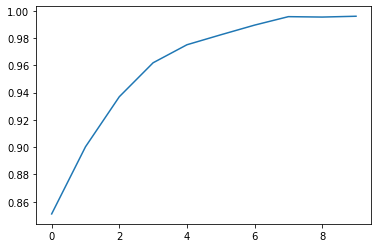

<Figure size 432x288 with 0 Axes>

In [12]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

#Embedding layer first hidden layer for NN on text data (1st param = max_features/no. of items in vocab , 2nd param = output dim (2D vector),
# 3rd param = input_length = length of input seq ) 
#LSTM layer - (1st param = no. of units in LSTM block)
#Each unit learns a diff. feature
#Dense Layer (1st param = no. of output units)

tokenizer = Tokenizer(num_words=30000, split = ' ')
tokenizer.fit_on_texts(corpus['Reviews'].values)
training_seq = np.array(tokenizer.texts_to_sequences(corpus['Reviews'].values))
training_seq = pad_sequences(training_seq)

train_label_seq = pd.get_dummies(corpus['Positivity']).values
X_train, X_test, y_train, y_test = train_test_split(training_seq, train_label_seq, train_size = 0.8)
print(X_train.shape)
print(X_test.shape)

model = Sequential([
    Embedding(30000, 150, input_length = training_seq.shape[1], dropout = 0.2),
    LSTM(200, dropout = 0.2),
    Dense(2, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(training_seq, train_label_seq, epochs= num_epochs, batch_size = 128, verbose = 1)
#batch_size, num_features, num_epochs are tunable parameters

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.figure()

(score, accuracy) = model.evaluate(X_test, y_test, batch_size=128, verbose = 2)
print(accuracy*100)
print(score*100)

model.save_weights("Reviews.hdf5", overwrite = True)